In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
from pmdarima.arima import auto_arima
import seaborn as sns
sns.set()

df = pd.read_csv ('210619monatszahlenjuni2021monatszahlen2106verkehrsunfaelle.csv')


print(df.head)

<bound method NDFrame.head of            MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT    WERT  \
0      Alkoholunfälle               insgesamt  2021  202101     NaN   
1      Alkoholunfälle               insgesamt  2021  202102     NaN   
2      Alkoholunfälle               insgesamt  2021  202103     NaN   
3      Alkoholunfälle               insgesamt  2021  202104     NaN   
4      Alkoholunfälle               insgesamt  2021  202105     NaN   
5      Alkoholunfälle               insgesamt  2021  202106     NaN   
6      Alkoholunfälle               insgesamt  2021  202107     NaN   
7      Alkoholunfälle               insgesamt  2021  202108     NaN   
8      Alkoholunfälle               insgesamt  2021  202109     NaN   
9      Alkoholunfälle               insgesamt  2021  202110     NaN   
10     Alkoholunfälle               insgesamt  2021  202111     NaN   
11     Alkoholunfälle               insgesamt  2021  202112     NaN   
12     Alkoholunfälle               insgesamt  

/home/cagaraza/.local/lib/python3.5/site-packages/pmdarima/__init__.py:100: UserWarning: pmdarima is not built or tested against versions of python older than 3.6. Your python version (3.5.2) is not guaranteed to be supported
  _py_version.major, _py_version.minor, _py_version.micro,


In [2]:
list(df.columns)

['MONATSZAHL',
 'AUSPRAEGUNG',
 'JAHR',
 'MONAT',
 'WERT',
 'VORJAHRESWERT',
 'VERAEND_VORMONAT_PROZENT',
 'VERAEND_VORJAHRESMONAT_PROZENT',
 'ZWOELF_MONATE_MITTELWERT']

In [3]:
alcohol_accidents = df.loc[df[df.columns[0]] == 'Alkoholunfälle']


In [4]:
df.loc[(df[df.columns[0]] == 'Alkoholunfälle') & (df[df.columns[1]] == 'insgesamt')] #alcohol and total for all categories

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN
5,Alkoholunfälle,insgesamt,2021,202106,NaN,49.0,NaN,NaN,NaN
6,Alkoholunfälle,insgesamt,2021,202107,NaN,58.0,NaN,NaN,NaN
7,Alkoholunfälle,insgesamt,2021,202108,NaN,46.0,NaN,NaN,NaN
8,Alkoholunfälle,insgesamt,2021,202109,NaN,46.0,NaN,NaN,NaN
9,Alkoholunfälle,insgesamt,2021,202110,NaN,34.0,NaN,NaN,NaN


In [5]:
df.loc[(df[df.columns[0]] == 'Alkoholunfälle') & (df[df.columns[1]] == 'insgesamt') & (df[df.columns[3]] == 'Summe')] #alcohol and total for all categories (total sum only)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
12,Alkoholunfälle,insgesamt,2020,Summe,430.0,434.0,NaN,-0.92,NaN
25,Alkoholunfälle,insgesamt,2019,Summe,434.0,398.0,NaN,9.05,NaN
38,Alkoholunfälle,insgesamt,2018,Summe,398.0,409.0,NaN,-2.69,NaN
51,Alkoholunfälle,insgesamt,2017,Summe,409.0,301.0,NaN,35.88,NaN
64,Alkoholunfälle,insgesamt,2016,Summe,301.0,411.0,NaN,-26.76,NaN
77,Alkoholunfälle,insgesamt,2015,Summe,411.0,382.0,NaN,7.59,NaN
90,Alkoholunfälle,insgesamt,2014,Summe,382.0,377.0,NaN,1.33,NaN
103,Alkoholunfälle,insgesamt,2013,Summe,377.0,440.0,NaN,-14.32,NaN
116,Alkoholunfälle,insgesamt,2012,Summe,440.0,397.0,NaN,10.83,NaN
129,Alkoholunfälle,insgesamt,2011,Summe,397.0,402.0,NaN,-1.24,NaN


264


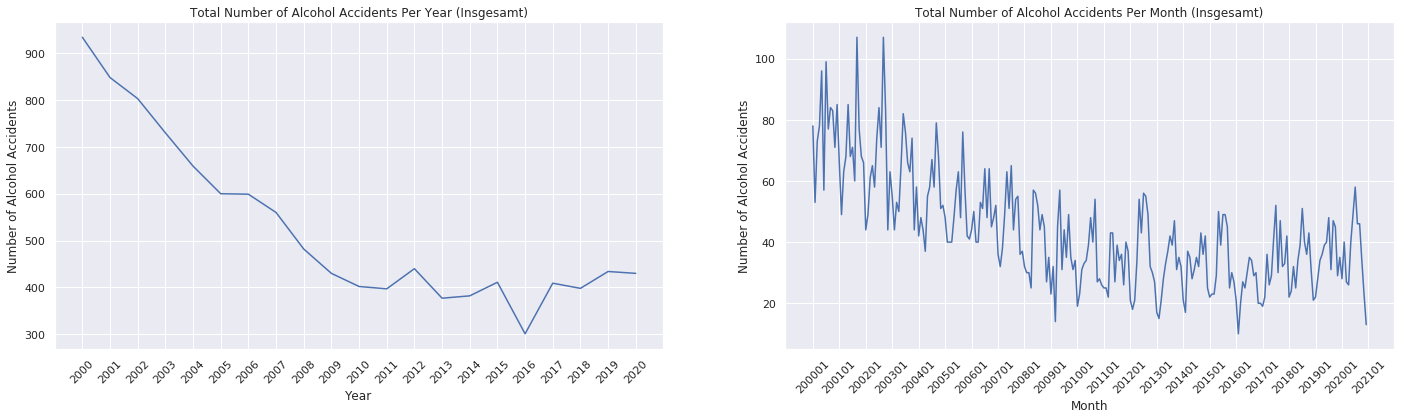

In [6]:
#annual insgesamt number of alcohol accidents

annual_alcohol_accident = df.loc[(df[df.columns[0]] == 'Alkoholunfälle') & (df[df.columns[1]] == 'insgesamt') & (df[df.columns[3]] == 'Summe')].sort_values(by=[df.columns[2]])
fig = plt.figure(figsize=(24, 6))
ax = fig.add_subplot(121)
ax.plot(annual_alcohol_accident.JAHR,annual_alcohol_accident.WERT)
plt.xlabel("Year")
plt.ylabel("Number of Alcohol Accidents")


#change labels into string to remove trailing decimal place on year value
xlabels = list(map(int, list(annual_alcohol_accident.JAHR)))
plt.xticks(annual_alcohol_accident.JAHR, xlabels,rotation=45)
plt.title("Total Number of Alcohol Accidents Per Year (Insgesamt)")

#monthly insgesamt number of alcohol accidents

monthly_alcohol_accident = df.loc[(df[df.columns[0]] == 'Alkoholunfälle') & (df[df.columns[1]] == 'insgesamt') & (df[df.columns[3]] != 'Summe')].sort_values([df.columns[3]])
df.loc[(df[df.columns[0]] == 'Alkoholunfälle') & (df[df.columns[1]] == 'insgesamt') & (df[df.columns[3]] != 'Summe')].sort_values([df.columns[3]])


ax = fig.add_subplot(122)

ax.plot(monthly_alcohol_accident.MONAT,monthly_alcohol_accident.WERT)
plt.xlabel("Month")
plt.ylabel("Number of Alcohol Accidents")
plt.title("Total Number of Alcohol Accidents Per Month (Insgesamt)")
plt.xticks(rotation=45)

#change labels into string to remove trailing decimal place on month value
xlabels = list(map(int, list(monthly_alcohol_accident.MONAT)))
print(len(xlabels))
ax.set_xticks(np.arange(0, len(xlabels), 12))
plt.savefig("Total Number of Alcohol Accidents(Insgesamt).png")
plt.show()


264


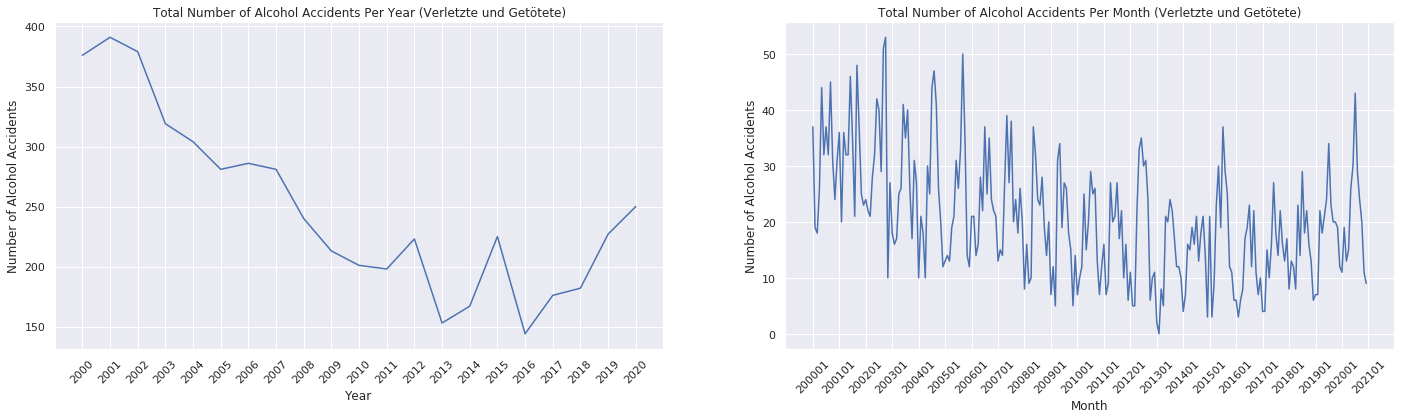

In [7]:
#Annual Verletzte und Getötete number of alcohol accidents

annual_alcohol_accident = df.loc[(df[df.columns[0]] == 'Alkoholunfälle') & (df[df.columns[1]] == 'Verletzte und Getötete') & (df[df.columns[3]] == 'Summe')].sort_values(by=[df.columns[2]])
fig = plt.figure(figsize=(24, 6))
ax1 = fig.add_subplot(121)
ax1.plot(annual_alcohol_accident.JAHR,annual_alcohol_accident.WERT)
plt.xlabel("Year")
plt.ylabel("Number of Alcohol Accidents")

#change labels into string to remove trailing decimal place on year value
xlabels = list(map(int, list(annual_alcohol_accident.JAHR)))
plt.xticks(annual_alcohol_accident.JAHR, xlabels,rotation=45)
plt.title("Total Number of Alcohol Accidents Per Year (Verletzte und Getötete)")



#monthly Verletzte und Getötete number of alcohol accidents

monthly_alcohol_accident = df.loc[(df[df.columns[0]] == 'Alkoholunfälle') & (df[df.columns[1]] == 'Verletzte und Getötete') & (df[df.columns[3]] != 'Summe')].sort_values([df.columns[3]])
df.loc[(df[df.columns[0]] == 'Alkoholunfälle') & (df[df.columns[1]] == 'insgesamt') & (df[df.columns[3]] != 'Summe')].sort_values([df.columns[3]])



ax = fig.add_subplot(122)

ax.plot(monthly_alcohol_accident.MONAT,monthly_alcohol_accident.WERT)
plt.xlabel("Month")
plt.ylabel("Number of Alcohol Accidents")
plt.title("Total Number of Alcohol Accidents Per Month (Verletzte und Getötete)")
plt.xticks(rotation=45)

#change labels into string to remove trailing decimal place on month value
xlabels = list(map(int, list(monthly_alcohol_accident.MONAT)))
print(len(xlabels))
ax.set_xticks(np.arange(0, len(xlabels), 12))

plt.savefig("Total Number of Alcohol Accidents (Verletzte und Getötete).png")
plt.show()



264


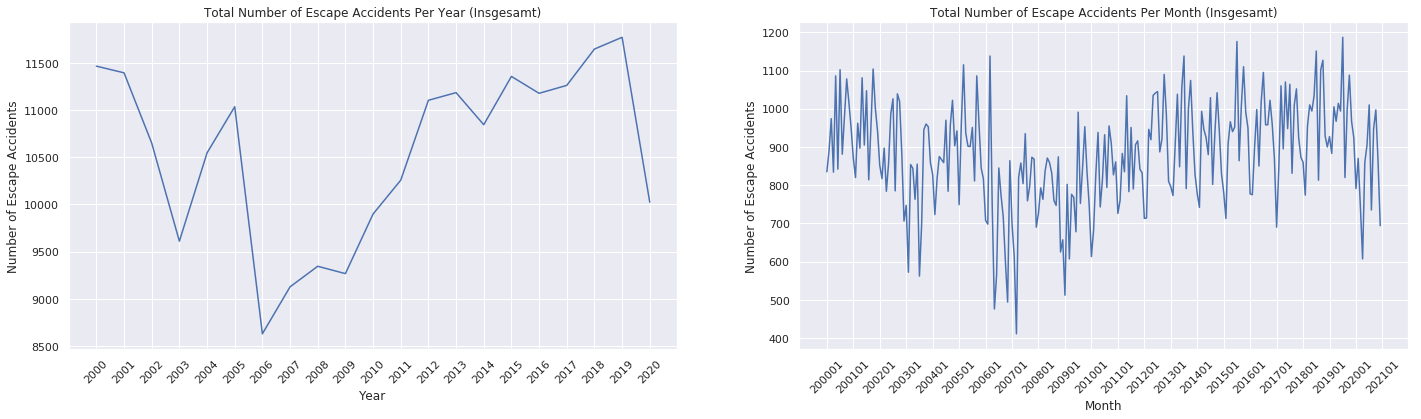

In [8]:
#annual insgesamt number of escape accidents

annual_escape_accident = df.loc[(df[df.columns[0]] == 'Fluchtunfälle') & (df[df.columns[1]] == 'insgesamt') & (df[df.columns[3]] == 'Summe')].sort_values(by=[df.columns[2]])
fig = plt.figure(figsize=(24, 6))
ax = fig.add_subplot(121)
ax.plot(annual_escape_accident.JAHR,annual_escape_accident.WERT)
plt.xlabel("Year")
plt.ylabel("Number of Escape Accidents")


#change labels into string to remove trailing decimal place on year value
xlabels = list(map(int, list(annual_escape_accident.JAHR)))
plt.xticks(annual_escape_accident.JAHR, xlabels,rotation=45)
plt.title("Total Number of Escape Accidents Per Year (Insgesamt)")

#monthly insgesamt number of escape accidents

monthly_escape_accident = df.loc[(df[df.columns[0]] == 'Fluchtunfälle') & (df[df.columns[1]] == 'insgesamt') & (df[df.columns[3]] != 'Summe')].sort_values([df.columns[3]])


ax = fig.add_subplot(122)

ax.plot(monthly_escape_accident.MONAT,monthly_escape_accident.WERT)
plt.xlabel("Month")
plt.ylabel("Number of Escape Accidents")
plt.title("Total Number of Escape Accidents Per Month (Insgesamt)")
plt.xticks(rotation=45)

#change labels into string to remove trailing decimal place on month value
xlabels = list(map(int, list(monthly_escape_accident.MONAT)))
print(len(xlabels))
ax.set_xticks(np.arange(0, len(xlabels), 12))
plt.savefig("Total Number of Escape Accidents (Insgesamt).png")
plt.show()


264


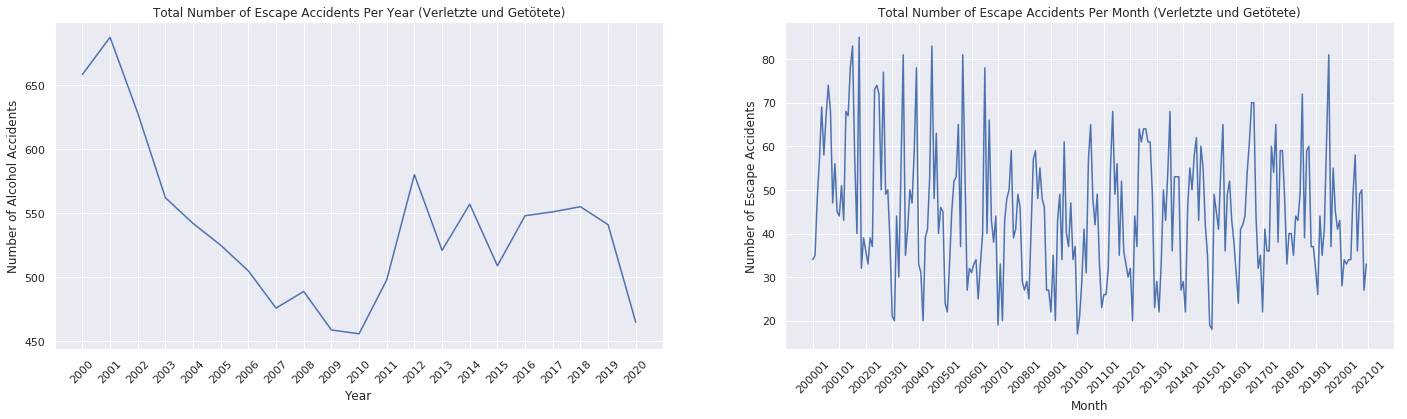

In [9]:
#Annual Verletzte und Getötete number of escape accidents

annual_escape_accident = df.loc[(df[df.columns[0]] == 'Fluchtunfälle') & (df[df.columns[1]] == 'Verletzte und Getötete') & (df[df.columns[3]] == 'Summe')].sort_values(by=[df.columns[2]])

fig = plt.figure(figsize=(24, 6))
ax1 = fig.add_subplot(121)
ax1.plot(annual_escape_accident.JAHR,annual_escape_accident.WERT)
plt.xlabel("Year")
plt.ylabel("Number of Alcohol Accidents")

#change labels into string to remove trailing decimal place on year value
xlabels = list(map(int, list(annual_escape_accident.JAHR)))
plt.xticks(annual_escape_accident.JAHR, xlabels,rotation=45)
plt.title("Total Number of Escape Accidents Per Year (Verletzte und Getötete)")



#monthly Verletzte und Getötete number of escape accidents

monthly_escape_accident = df.loc[(df[df.columns[0]] == 'Fluchtunfälle') & (df[df.columns[1]] == 'Verletzte und Getötete') & (df[df.columns[3]] != 'Summe')].sort_values([df.columns[3]])



ax = fig.add_subplot(122)

ax.plot(monthly_escape_accident.MONAT,monthly_escape_accident.WERT)
plt.xlabel("Month")
plt.ylabel("Number of Escape Accidents")
plt.title("Total Number of Escape Accidents Per Month (Verletzte und Getötete)")
plt.xticks(rotation=45)

#change labels into string to remove trailing decimal place on month value
xlabels = list(map(int, list(monthly_escape_accident.MONAT)))
print(len(xlabels))
ax.set_xticks(np.arange(0, len(xlabels), 12))
plt.savefig("Total Number of Escape Accidents (Verletzte und Getötete).png")
plt.show()



264


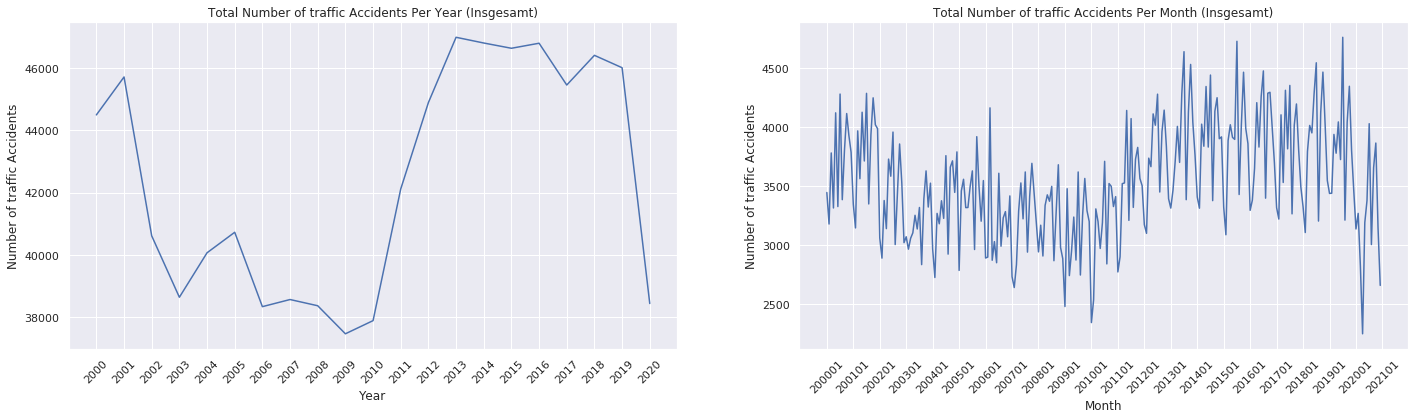

In [10]:
#annual insgesamt number of traffic accidents

annual_traffic_accident = df.loc[(df[df.columns[0]] == 'Verkehrsunfälle') & (df[df.columns[1]] == 'insgesamt') & (df[df.columns[3]] == 'Summe')].sort_values(by=[df.columns[2]])
fig = plt.figure(figsize=(24, 6))
ax = fig.add_subplot(121)
ax.plot(annual_traffic_accident.JAHR,annual_traffic_accident.WERT)
plt.xlabel("Year")
plt.ylabel("Number of traffic Accidents")


#change labels into string to remove trailing decimal place on year value
xlabels = list(map(int, list(annual_traffic_accident.JAHR)))
plt.xticks(annual_traffic_accident.JAHR, xlabels,rotation=45)
plt.title("Total Number of traffic Accidents Per Year (Insgesamt)")

#monthly insgesamt number of traffic accidents

monthly_traffic_accident = df.loc[(df[df.columns[0]] == 'Verkehrsunfälle') & (df[df.columns[1]] == 'insgesamt') & (df[df.columns[3]] != 'Summe')].sort_values([df.columns[3]])


ax = fig.add_subplot(122)

ax.plot(monthly_traffic_accident.MONAT,monthly_traffic_accident.WERT)
plt.xlabel("Month")
plt.ylabel("Number of traffic Accidents")
plt.title("Total Number of traffic Accidents Per Month (Insgesamt)")
plt.xticks(rotation=45)

#change labels into string to remove trailing decimal place on month value
xlabels = list(map(int, list(monthly_traffic_accident.MONAT)))
print(len(xlabels))
ax.set_xticks(np.arange(0, len(xlabels), 12))
plt.savefig("Total Number of Traffic Accidents (Insgesamt).png")
plt.show()


264


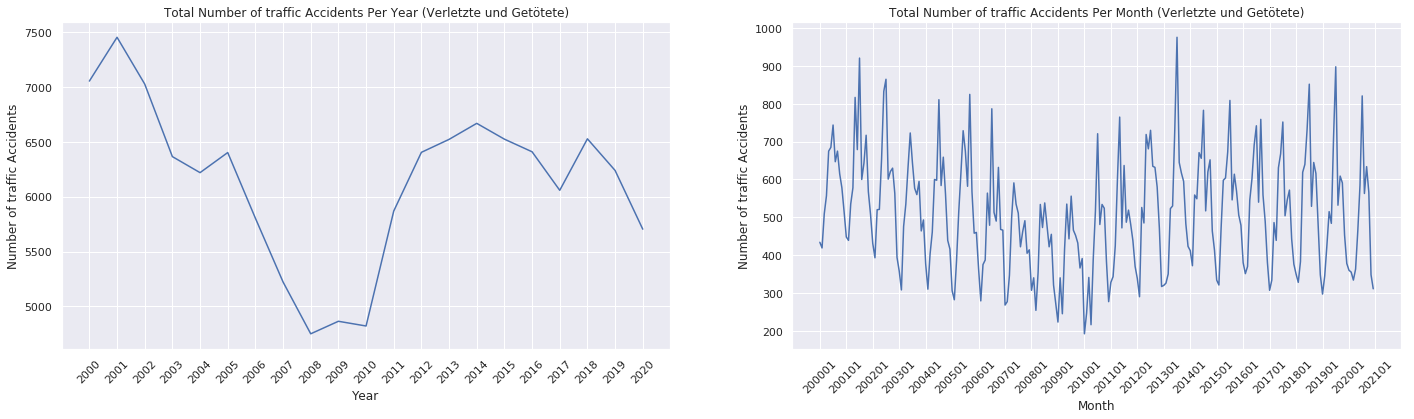

In [11]:
#annual Verletzte und Getötete number of traffic accidents

annual_traffic_accident = df.loc[(df[df.columns[0]] == 'Verkehrsunfälle') & (df[df.columns[1]] == 'Verletzte und Getötete') & (df[df.columns[3]] == 'Summe')].sort_values(by=[df.columns[2]])
fig = plt.figure(figsize=(24, 6))
ax = fig.add_subplot(121)
ax.plot(annual_traffic_accident.JAHR,annual_traffic_accident.WERT)
plt.xlabel("Year")
plt.ylabel("Number of traffic Accidents")


#change labels into string to remove trailing decimal place on year value
xlabels = list(map(int, list(annual_traffic_accident.JAHR)))
plt.xticks(annual_traffic_accident.JAHR, xlabels,rotation=45)
plt.title("Total Number of traffic Accidents Per Year (Verletzte und Getötete)")

#monthly Verletzte und Getötete number of traffic accidents

monthly_traffic_accident = df.loc[(df[df.columns[0]] == 'Verkehrsunfälle') & (df[df.columns[1]] == 'Verletzte und Getötete') & (df[df.columns[3]] != 'Summe')].sort_values([df.columns[3]])


ax = fig.add_subplot(122)

ax.plot(monthly_traffic_accident.MONAT,monthly_traffic_accident.WERT)
plt.xlabel("Month")
plt.ylabel("Number of traffic Accidents")
plt.title("Total Number of traffic Accidents Per Month (Verletzte und Getötete)")
plt.xticks(rotation=45)

#change labels into string to remove trailing decimal place on month value
xlabels = list(map(int, list(monthly_traffic_accident.MONAT)))
print(len(xlabels))
ax.set_xticks(np.arange(0, len(xlabels), 12))
plt.savefig("Total Number of Traffic Accidents (Verletzte und Getötete).png")
plt.show()


In [26]:
monthly_alcohol_accident = df.loc[(df[df.columns[0]] == 'Alkoholunfälle') & (df[df.columns[1]] == 'insgesamt') & (df[df.columns[3]] != 'Summe')].sort_values([df.columns[3]])
monthly_alcohol_accident


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
273,Alkoholunfälle,insgesamt,2000,200001,78.0,NaN,NaN,NaN,78.0
274,Alkoholunfälle,insgesamt,2000,200002,53.0,NaN,-32.05,NaN,66.0
275,Alkoholunfälle,insgesamt,2000,200003,73.0,NaN,37.74,NaN,68.0
276,Alkoholunfälle,insgesamt,2000,200004,78.0,NaN,6.85,NaN,71.0
277,Alkoholunfälle,insgesamt,2000,200005,96.0,NaN,23.08,NaN,76.0
278,Alkoholunfälle,insgesamt,2000,200006,57.0,NaN,-40.63,NaN,73.0
279,Alkoholunfälle,insgesamt,2000,200007,99.0,NaN,73.68,NaN,76.0
280,Alkoholunfälle,insgesamt,2000,200008,77.0,NaN,-22.22,NaN,76.0
281,Alkoholunfälle,insgesamt,2000,200009,84.0,NaN,9.09,NaN,77.0
282,Alkoholunfälle,insgesamt,2000,200010,83.0,NaN,-1.19,NaN,78.0


In [35]:
monthly_data=monthly_alcohol_accident.WERT.dropna()
monthly_alcohol_accident.WERT.dropna()

273     78.0
274     53.0
275     73.0
276     78.0
277     96.0
278     57.0
279     99.0
280     77.0
281     84.0
282     83.0
283     71.0
284     85.0
260     66.0
261     49.0
262     63.0
263     68.0
264     85.0
265     68.0
266     71.0
267     60.0
268    107.0
269     77.0
270     68.0
271     66.0
247     44.0
248     49.0
249     61.0
250     65.0
251     58.0
252     74.0
       ...  
45      51.0
46      40.0
47      36.0
48      43.0
49      31.0
50      21.0
26      22.0
27      28.0
28      34.0
29      36.0
30      39.0
31      40.0
32      48.0
33      31.0
34      47.0
35      45.0
36      29.0
37      35.0
13      28.0
14      40.0
15      27.0
16      26.0
17      40.0
18      49.0
19      58.0
20      46.0
21      46.0
22      34.0
23      23.0
24      13.0
Name: WERT, Length: 252, dtype: float64

In [33]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(monthly_data)

(0.01, False)

In [36]:
len(monthly_data) #70/30 split

252

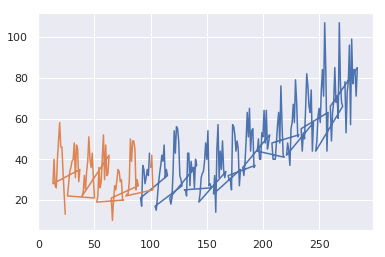

In [37]:
train = monthly_data[:177]
test = monthly_data[-75:]
plt.plot(train)
plt.plot(test)